# Session 2-- Manipulating data and regression 


## Session 2 is composed of 2 parts¶

1. Module 3: Manipulating data
    - [Notes](https://github.com/corybaird/SPP_Data_Seminar/blob/main/R/Session_2/Module_3_Manipulation.ipynb)
    - [Video](https://www.youtube.com/watch?v=6UCIoUJusTI&ab_channel=CB)
2. Module 4: Regression
    - Notes (current page)
    - [Video](https://youtu.be/wCCYfMe_h3k)





# Module 4: Regression

## A.1 Import libraries

In [ ]:
# Step 1
install.packages('dplyr')
install.packages('ggplot2')
install.packages('WDI')

#Step 2
library(ggplot2)
library(dplyr)
library(WDI)

# 1. Install data

## 1.1 WDI data

### 1.1.1 Install with WDI function from WDI library

In [70]:
df_wdi = WDI(
country = "all",
indicator = c("NY.GDP.PCAP.KD", #GDP
              "SP.POP.DPND" # Age dependency
             ),
start = 1980,
end = 2020,
extra = FALSE,
cache = NULL,
latest = NULL,
language = "en"
)

In [71]:
df_wdi %>% head(2)

iso2c,country,year,NY.GDP.PCAP.KD,SP.POP.DPND
1A,Arab World,1980,5263.215,92.25752
1A,Arab World,1981,5255.007,91.96566


### 1.1.2 Filter data

In [72]:
df_wdi = df_wdi %>% 
filter(year==2020)

In [73]:
df_wdi %>% head(3)

iso2c,country,year,NY.GDP.PCAP.KD,SP.POP.DPND
1A,Arab World,2020,6043.964,61.01996
1W,World,2020,10565.499,54.56867
4E,East Asia & Pacific (excluding high income),2020,6881.016,44.12737


### 1.1.3 Rename column

In [74]:
df_wdi = df_wdi %>% 
rename('GDP' = 'NY.GDP.PCAP.KD',
      'Age_dep_ratio' = 'SP.POP.DPND')

df_wdi %>% head(3)

iso2c,country,year,GDP,Age_dep_ratio
1A,Arab World,2020,6043.964,61.01996
1W,World,2020,10565.499,54.56867
4E,East Asia & Pacific (excluding high income),2020,6881.016,44.12737


### 1.1.4 Drop columns

In [75]:
df_wdi = df_wdi %>% select(country, GDP, Age_dep_ratio)

df_wdi %>% head(3)

country,GDP,Age_dep_ratio
Arab World,6043.964,61.01996
World,10565.499,54.56867
East Asia & Pacific (excluding high income),6881.016,44.12737


## 1.2 NYT data

In [76]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/excess-deaths/deaths.csv'
df_nyt = read.csv(url)


In [77]:
df_nyt %>% head(2)

country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
Austria,,weekly,2020-01-06,2020-01-12,2020,1,2,1702,1806,-104,2015-2019 historical data
Austria,,weekly,2020-01-13,2020-01-19,2020,1,3,1797,1819,-22,2015-2019 historical data


### 1.2.1 Filter only last date

In [78]:
# Converts column type from factor to date
df_nyt$end_date = as.Date(df_nyt$end_date)

In [79]:
df_nyt = df_nyt %>% 
filter(end_date=='2020-11-29')  

df_nyt %>% head(3)

country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
Austria,,weekly,2020-11-23,2020-11-29,2020,11,48,2425,1587,838,2015-2019 historical data
Chile,,weekly,2020-11-23,2020-11-29,2020,11,48,2235,2007,228,2015-2019 historical data
Czech Republic,,weekly,2020-11-23,2020-11-29,2020,11,48,3029,2143,886,2015-2019 historical data


### 1.2.2 Select columns

In [80]:
df_nyt = df_nyt %>% 
select(country, expected_deaths, excess_deaths)


In [81]:
df_nyt %>% head(3)

country,expected_deaths,excess_deaths
Austria,1587,838
Chile,2007,228
Czech Republic,2143,886


## 1.3 Create new column

In [84]:
df_nyt = df_nyt %>% 
mutate(excess_death_pct = excess_deaths/expected_deaths	)

df_nyt %>% head(3)

country,expected_deaths,excess_deaths,excess_death_pct
Austria,1587,838,0.5280403
Chile,2007,228,0.1136024
Czech Republic,2143,886,0.4134391


## 1.3 Merge

In [85]:
df_merge = merge(df_nyt, df_wdi, by='country')
df_merge %>% head(3)

country,expected_deaths,excess_deaths,excess_death_pct,GDP,Age_dep_ratio
Austria,1587,838,0.5280403,47008.71,50.63911
Chile,2007,228,0.1136024,14050.18,45.94575
Czech Republic,2143,886,0.4134391,22843.04,56.00270


# 2. Regression

## 2.A Always visualize before statistical analysis

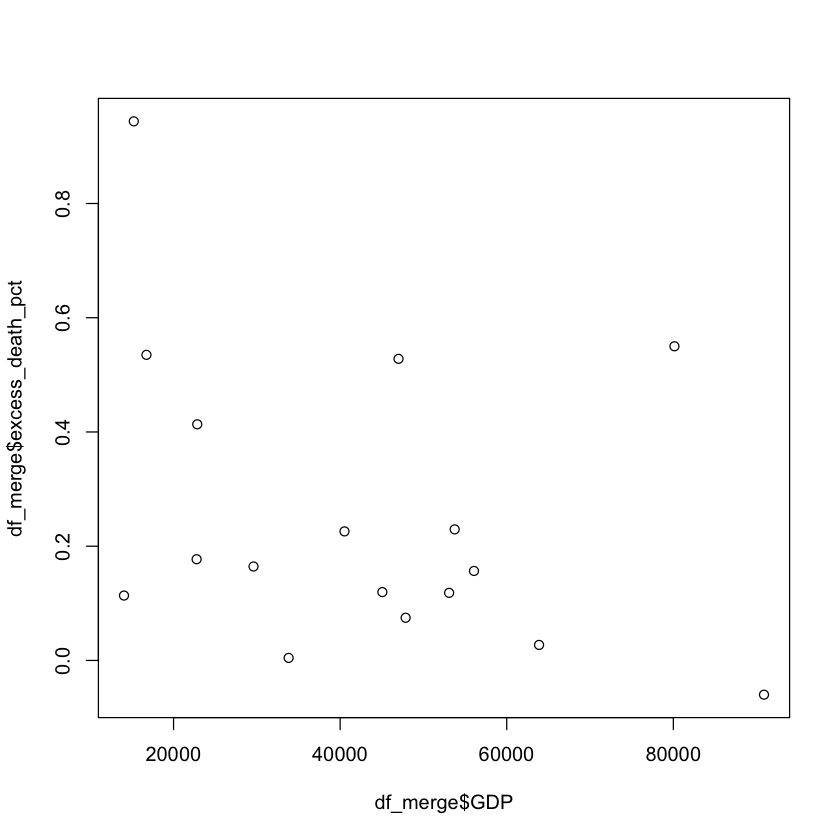

In [112]:
plot(df_merge$GDP,df_merge$excess_death_pct)

## 1.1 OLS

In [113]:
lm(excess_death_pct ~ GDP, data= df_merge)


Call:
lm(formula = excess_death_pct ~ GDP, data = df_merge)

Coefficients:
(Intercept)          GDP  
  4.301e-01   -4.077e-06  


## 1.2 Saving and manipulating results

In [114]:
reg = lm(excess_death_pct ~ GDP, data= df_merge)

In [115]:
summary(reg)


Call:
lm(formula = excess_death_pct ~ GDP, data = df_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28779 -0.14494 -0.09537  0.07647  0.57582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.301e-01  1.354e-01   3.176  0.00626 **
GDP         -4.077e-06  2.807e-06  -1.452  0.16701   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2499 on 15 degrees of freedom
Multiple R-squared:  0.1233,	Adjusted R-squared:  0.06483 
F-statistic: 2.109 on 1 and 15 DF,  p-value: 0.167


### 1.2.1 Residuals and other data

In [95]:
reg$residuals #Residuals

1           2           3           4           5           6 
 0.28958879 -0.25921978  0.07646508 -0.14248858 -0.16023579 -0.03897531 
          7           8           9          10          11          12 
-0.12671247  0.17315266 -0.28778747 -0.09536815 -0.11949632 -0.16004095 
         13          14          15          16          17 
-0.14494090 -0.04483958  0.44659253  0.57582031  0.01848593

In [96]:
#reg$fitted.values #Yhat
#reg$coefficients #coefficients
#reg$df #Degrees of freedom

## 1.3 Plotting results

### 1.3.1 Reg line with scatter

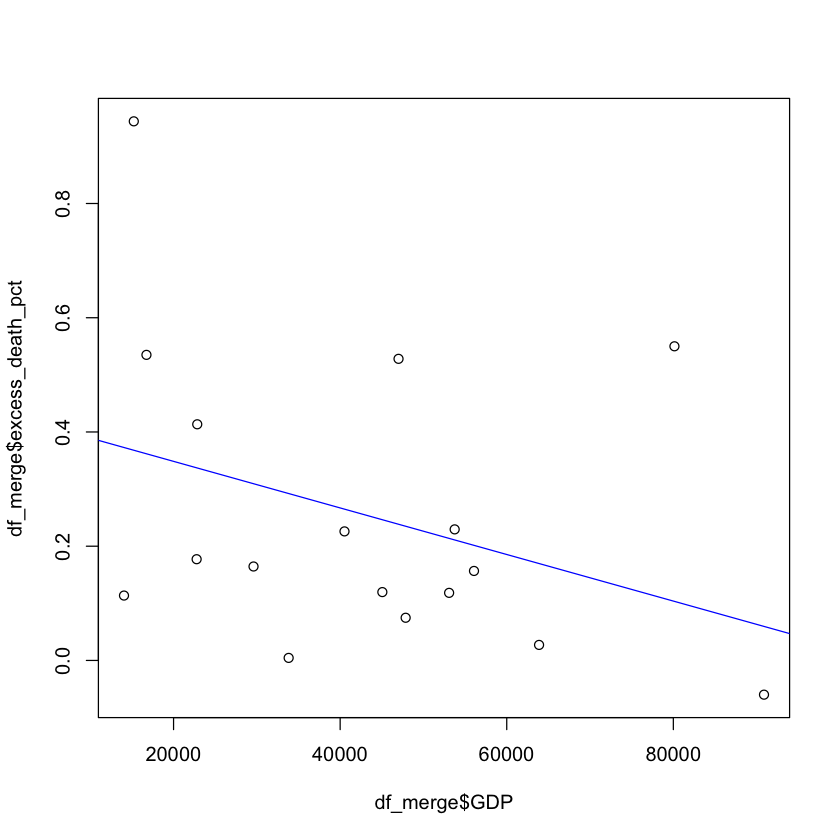

In [111]:
plot(df_merge$GDP,df_merge$excess_death_pct)
abline(lm(excess_death_pct ~ GDP , data= df_merge),col="blue")

### 1.3.2 Plotting residuals

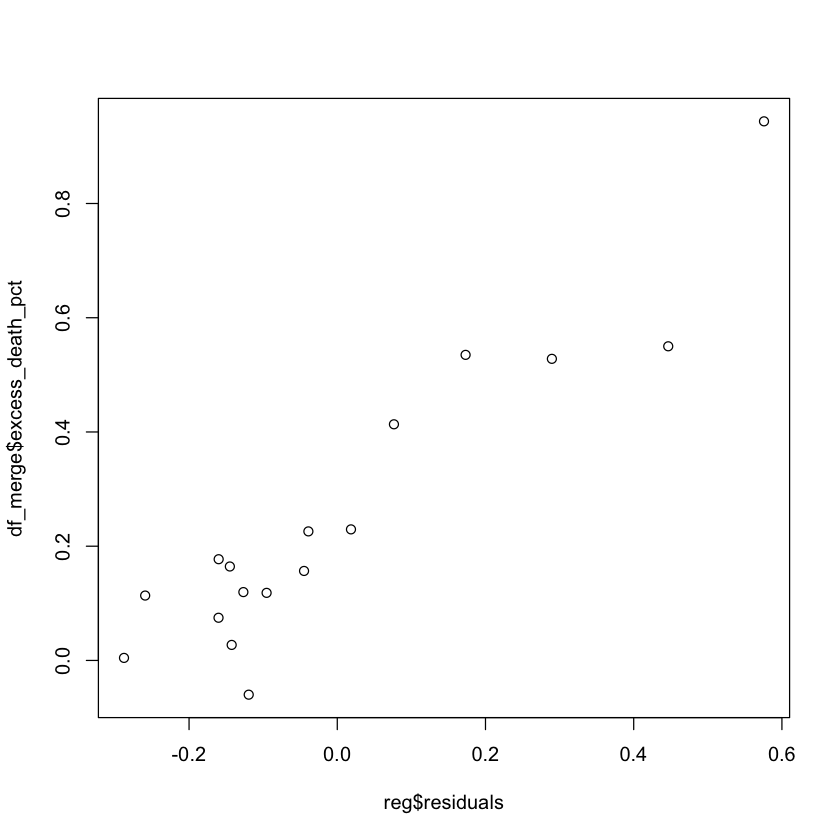

In [97]:
plot(reg$residuals, df_merge$excess_death_pct)

## 1.4 Multiple regression
- Simply add column name with plus after first variable

In [117]:
reg = lm(excess_death_pct ~ GDP + Age_dep_ratio, data= df_merge)
summary(reg)


Call:
lm(formula = excess_death_pct ~ GDP + Age_dep_ratio, data = df_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43493 -0.13015 -0.02319  0.10548  0.46422 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    1.547e+00  5.945e-01   2.602   0.0209 *
GDP           -3.327e-06  2.614e-06  -1.273   0.2239  
Age_dep_ratio -2.072e-02  1.078e-02  -1.922   0.0752 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2301 on 14 degrees of freedom
Multiple R-squared:  0.3063,	Adjusted R-squared:  0.2072 
F-statistic: 3.091 on 2 and 14 DF,  p-value: 0.07732


## 1.5 Robust S.E. Regression

In [141]:
install.packages('MASS')
library(MASS)

In [142]:
reg = rlm(excess_death_pct ~ GDP + Age_dep_ratio, data= df_merge)
summary(reg)


Call: rlm(formula = excess_death_pct ~ GDP + Age_dep_ratio, data = df_merge)
Residuals:
     Min       1Q   Median       3Q      Max 
-0.43975 -0.12007 -0.01145  0.11030  0.45895 

Coefficients:
              Value   Std. Error t value
(Intercept)    1.5435  0.5342     2.8893
GDP            0.0000  0.0000    -1.6686
Age_dep_ratio -0.0204  0.0097    -2.1008

Residual standard error: 0.178 on 14 degrees of freedom

# 2. Diagnostics

## 2.A Regression

In [124]:
reg = lm(excess_death_pct ~ GDP, data= df_merge)

## 2.1 Breusch pagan: test for heteroskedasticity¶


In [125]:
#install.packages('lmtest')
library(lmtest)

In [127]:
bp = bptest(reg)
bp


	studentized Breusch-Pagan test

data:  reg
BP = 0.38122, df = 1, p-value = 0.537


## 2.2 DW-test: Serial correlation

Serial correlation occurs when:

- Important variable is omitted
- Functional misspecification
- Measurement error in independent variable


This statistic will always be between 0 and 4.

- Inidication of no serial correlation: the test statistic equals 2.
- The closer to 0 the statistic, the more evidence for positive serial correlation.
- The closer to 4, the more evidence for negative serial correlation.

In [138]:
dwtest(reg)


	Durbin-Watson test

data:  reg
DW = 1.5003, p-value = 0.1574
alternative hypothesis: true autocorrelation is greater than 0


## 2.3 Functional misspecification

In [139]:
resettest(reg)


	RESET test

data:  reg
RESET = 1.4778, df1 = 2, df2 = 13, p-value = 0.2641
